**ldct or ndct**

My actual problem is to denoise the low dose image but decided to try the tutorial below to somehow to get to know the tensoflow keras libraries
This code was created by using a github tutorial 
https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb

In [1]:
import os
train_ldct_dir = os.path.join("CT_data_png/ldct_1e5/train")
print(train_ldct_dir)
train_ndct_dir = os.path.join("CT_data_png/ndct/train")
print(train_ndct_dir)

train_ldct_names = os.listdir(train_ldct_dir)
print(train_ldct_names[:10])


train_ndct_names = os.listdir(train_ndct_dir)
print(train_ndct_names[:10])

CT_data_png/ldct_1e5/train
CT_data_png/ndct/train
['00000033_img.png', '00000023_img.png', '00000041_img.png', '00000048_img.png', '00000015_img.png', '00000005_img.png', '00000049_img.png', '00000004_img.png', '00000014_img.png', '00000022_img.png']
['00000033_img.png', '00000023_img.png', '00000041_img.png', '00000048_img.png', '00000015_img.png', '00000005_img.png', '00000049_img.png', '00000004_img.png', '00000014_img.png', '00000022_img.png']


First, configure the matplot parameters:
My code was adopted to run on linux machines

In [2]:
from IPython import get_ipython
ipython = get_ipython()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 low dose images and 8 normal dose images pictures. You can rerun the cell to see a fresh batch each time:



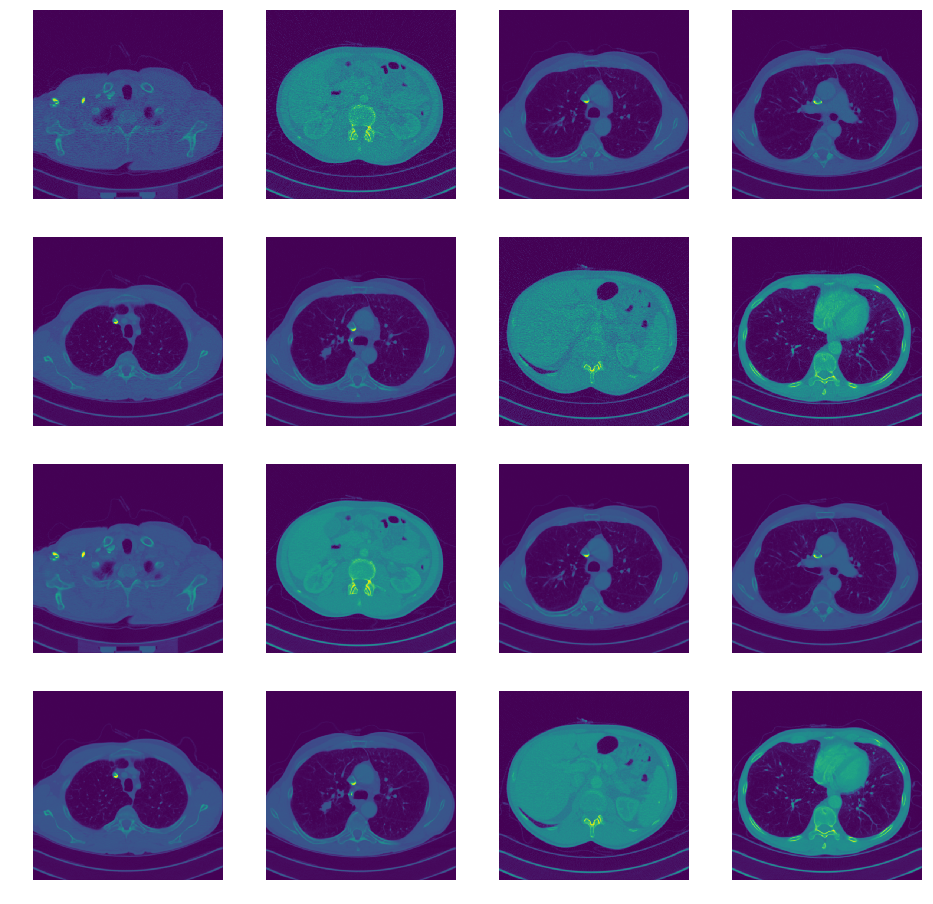

In [3]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ldct_pix = [os.path.join(train_ldct_dir, fname) 
                for fname in train_ldct_names[pic_index-8:pic_index]]
next_ndct_pix = [os.path.join(train_ndct_dir, fname) 
                for fname in train_ndct_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ldct_pix+next_ndct_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Step 1 will be to import tensorflow.

In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0708 23:14:45.473498 4587591104 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0708 23:14:45.702614 4587591104 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'CT_data_png/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 140 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 38s 5s/step - loss: 0.7289 - acc: 0.4911
Epoch 2/15
8/8 [==============================] - 31s 4s/step - loss: 0.6930 - acc: 0.5018
Epoch 3/15
8/8 [==============================] - 36s 4s/step - loss: 0.6914 - acc: 0.5107
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 0.6906 - acc: 0.5000
Epoch 5/15
8/8 [==============================] - 36s 4s/step - loss: 0.6990 - acc: 0.5946
Epoch 6/15
8/8 [==============================] - 36s 4s/step - loss: 0.6803 - acc: 0.5643
Epoch 7/15
2/8 [======>.......................] - ETA: 28s - loss: 0.6610 - acc: 0.5071 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a ndct")
  else:
    print(fn + " is a ldct")
 

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_ldct_dir, f) for f in train_ldct_names]
human_img_files = [os.path.join(train_ndct_dir, f) for f in train_ndct_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')